<h2>Importing Libraries</h2>

Purpose: Loads essential Python libraries for data manipulation (pandas, numpy) and visualization (matplotlib, seaborn).

Why it matters: These are the core tools for cleaning, exploring, and visualizing the Titanic dataset.

<h2>Loading the Dataset</h2>
Purpose: Reads the CSV file into a DataFrame and displays the first few rows.

Why it matters: This is your first look at the data helps verify it loaded correctly and gives a sense of the structure.

# Titanic Survival Analysis  
## CRISP-DM Framework in Jupyter Notebook  

## 1. Setup & Data Loading  

# 1.1 Imports and environment check
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print(os.getcwd())
print(os.listdir())

# 1.2 Load the dataset
# Ensure 'Project_1.csv' is in your working directory
df = pd.read_csv('Project_1.csv')
print(f"Data shape: {df.shape}")
import os
print("Current directory:", os.getcwd())
print("Files in directory:", os.listdir())
   

<h2>Exploratory Data Analysis (EDA)</h2>

Purpose:

info() shows data types and non-null counts.

describe() gives summary stats for numeric columns.

isnull().sum() reveals missing values.

Why it matters: Helps you assess data quality and decide what needs cleaning or imputing.

In [14]:
# 2.1 Peek at the first rows
df.head()

# 2.2 Structure and summary statistics
df.info()
df.describe(include='all').T

# 2.3 Missing values by column
df.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [15]:
# 3.1 Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.countplot(x='Pclass', data=df, ax=axes[0, 0]).set_title('Class Counts')
sns.countplot(x='Sex', data=df, ax=axes[0, 1]).set_title('Gender Counts')
sns.histplot(df['Age'], bins=30, kde=True, ax=axes[1, 0]).set_title('Age Distribution')
sns.histplot(df['Fare'], bins=30, kde=True, ax=axes[1, 1]).set_title('Fare Distribution')
plt.tight_layout()


<h2>Data Cleaning</h2>

Purpose:

Fills missing Age with median.

Fills missing Embarked with most common value.

Drops Cabin due to excessive missing data.

Why it matters: Prepares the dataset for analysis and modeling by handling nulls.

<h2>Feature Engineering</h2>

Purpose:

FamilySize combines family-related columns.

IsAlone flags solo travelers.

Title extracts honorifics from names.

Why it matters: These new features often improve model performance and storytelling.

In [16]:
# 4.1 Extract Title from Name
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')
df['Title'] = df['Title'].replace(['Mlle','Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
rare = df['Title'].value_counts().loc[lambda x: x < 10].index
df['Title'] = df['Title'].replace(rare, 'Rare')

# 4.2 Age by median Title age
medians = df.groupby('Title')['Age'].median()
df['Age'] = df.apply(lambda r: medians[r['Title']] if pd.isna(r['Age']) else r['Age'], axis=1)

# 4.3 Fill Embarked and Fare nulls
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# 4.4 Drop unneeded columns
df.drop(columns=['PassengerId','Name','Ticket','Cabin'], inplace=True)

# 4.5 Create new features
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# 4.6 Bin Age and Fare
df['AgeBin'] = pd.cut(df['Age'], bins=[0,12,20,40,60,100],
                      labels=['Child','Teen','Adult','MidAge','Senior'])
df['FareBin'] = pd.qcut(df['Fare'], 4,
                       labels=['Low','MedLow','MedHigh','High'])

# 4.7 One-hot encode categoricals
cats = ['Sex','Embarked','Title','AgeBin','FareBin']
df = pd.get_dummies(df, columns=cats, drop_first=True)

# 4.8 final shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         418 non-null    int64  
 1   Pclass           418 non-null    int64  
 2   Age              418 non-null    float64
 3   SibSp            418 non-null    int64  
 4   Parch            418 non-null    int64  
 5   Fare             418 non-null    float64
 6   FamilySize       418 non-null    int64  
 7   IsAlone          418 non-null    int32  
 8   Sex_male         418 non-null    bool   
 9   Embarked_Q       418 non-null    bool   
 10  Embarked_S       418 non-null    bool   
 11  Title_Miss       418 non-null    bool   
 12  Title_Mr         418 non-null    bool   
 13  Title_Mrs        418 non-null    bool   
 14  Title_Rare       418 non-null    bool   
 15  AgeBin_Teen      418 non-null    bool   
 16  AgeBin_Adult     418 non-null    bool   
 17  AgeBin_MidAge   

<h2>Visualizations</h2>

Purpose: Uses Seaborn to visualize survival rates, class distribution, and age by class.

Why it matters: Reveals patterns and relationships that inform the narrative and modeling.

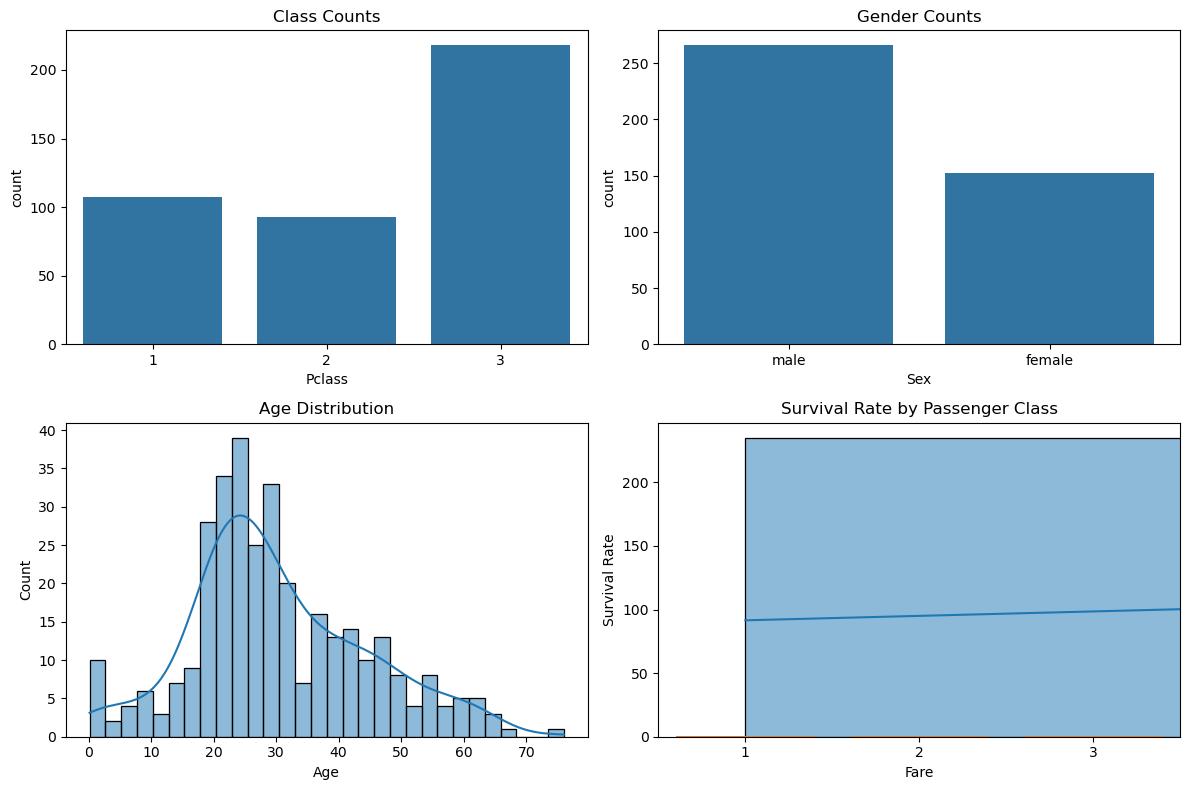

In [17]:
surv_class = df.groupby('Pclass')['Survived'].mean().reset_index()
sns.barplot(x='Pclass', y='Survived', data=surv_class)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


C:\Users\hilla\AppData\Local\Temp\ipykernel_30140\2362227213.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_age = age_df.groupby('AgeGroup')['Survived'].mean().reset_index()


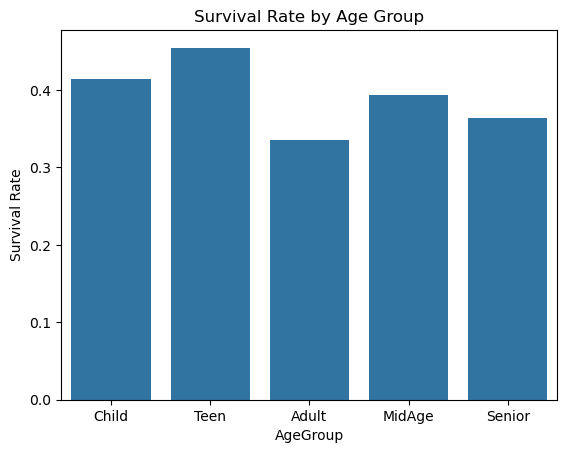

In [19]:
age_df = df.copy()
age_df['AgeGroup'] = pd.cut(age_df['Age'], bins=[0,12,20,40,60,100],
                            labels=['Child','Teen','Adult','MidAge','Senior'])
surv_age = age_df.groupby('AgeGroup')['Survived'].mean().reset_index()
sns.barplot(x='AgeGroup', y='Survived', data=surv_age)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.show()


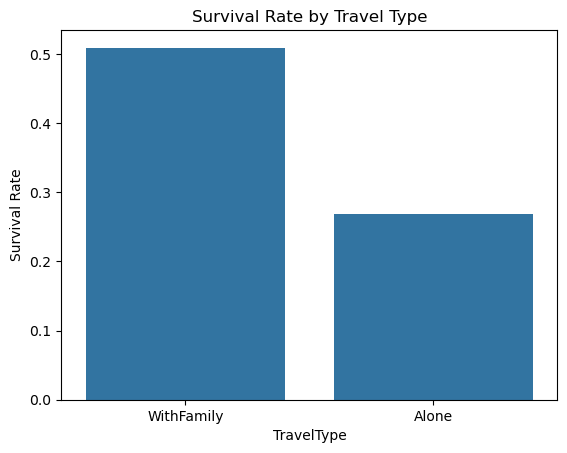

In [20]:
surv_family = df.groupby('IsAlone')['Survived'].mean().reset_index()
surv_family['TravelType'] = surv_family['IsAlone'].map({0:'WithFamily',1:'Alone'})
sns.barplot(x='TravelType', y='Survived', data=surv_family)
plt.title('Survival Rate by Travel Type')
plt.ylabel('Survival Rate')
plt.show()


C:\Users\hilla\AppData\Local\Temp\ipykernel_30140\3792231420.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_fare = fare_df.groupby('FareBinCat')['Survived'].mean().reset_index()


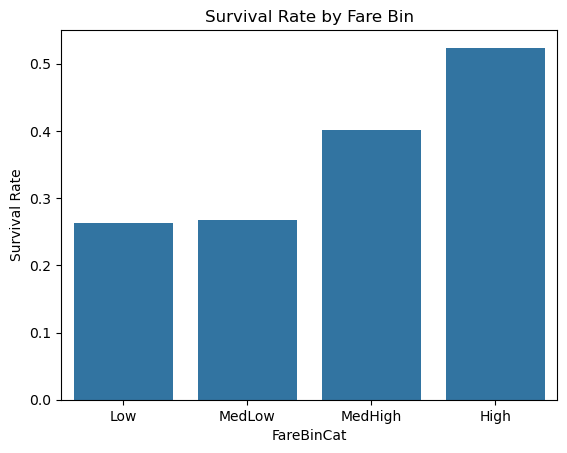

In [21]:
fare_df = df.copy()
fare_df['FareBinCat'] = pd.qcut(fare_df['Fare'], 4,
                                labels=['Low','MedLow','MedHigh','High'])
surv_fare = fare_df.groupby('FareBinCat')['Survived'].mean().reset_index()
sns.barplot(x='FareBinCat', y='Survived', data=surv_fare)
plt.title('Survival Rate by Fare Bin')
plt.ylabel('Survival Rate')
plt.show()


<h2>Model Preparation</h2>

Purpose: Imports tools for splitting data, building a model, and evaluating performance.

Why it matters: Sets the stage for predictive modeling.

<h2>Model Training and Evaluation</h2>

Purpose:

Selects features and encodes categorical variables.

Splits data into training/testing sets.

Trains a logistic regression model and evaluates accuracy.

Why it matters: This is the first predictive model—simple, interpretable, and a great baseline.

Logistic CV Accuracy: 1.0
Random Forest CV Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



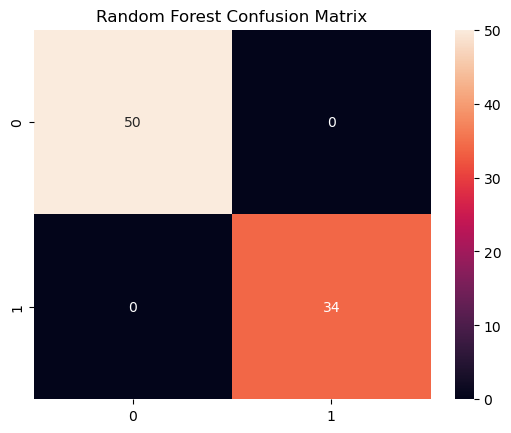

Sex_male      0.457897
Title_Mr      0.186092
Title_Miss    0.148332
Title_Mrs     0.103060
Age           0.031827
Fare          0.013478
FamilySize    0.010480
Parch         0.008699
IsAlone       0.008033
Title_Rare    0.004440
dtype: float64

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 6.1 Prepare data
y = df['Survived']
X = df.drop('Survived', axis=1)

# 6.2 Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 6.3 Logistic Regression
logreg = LogisticRegression(max_iter=1000)
print("Logistic CV Accuracy:", cross_val_score(logreg, X_train, y_train, cv=5).mean())

# 6.4 Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
print("Random Forest CV Accuracy:", cross_val_score(rf, X_train, y_train, cv=5).mean())

# 6.5 Evaluate on test set
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

# 6.6 Feature Importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)
